# 将小区数据重新细分

## 中高层小区，原分级8-18

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel(r"H:\learning_notes\SUZHOU_CHANGE_EQUATION\中高层住宅系数计算结果.xlsx")
df.head(20)

,城市,行政区域,类型,小区名称,地址,所在楼层,总楼层,面积,结构,建筑年代,...,买卖时间,单价,朝向系数,成新系数,结构系数,面积系数,装修系数,ratio,xishu,评估价格
0,宿州市,埇桥区,中高层住宅,三里洋房 2.4.6#（8）有地下室,迎宾大道与淮海南路交叉口,2,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4900,100,103,102,100,98,0.250000,42014.597661,4900.0
1,宿州市,埇桥区,中高层住宅,三里洋房 2.4.6#（8）有地下室,迎宾大道与淮海南路交叉口,3,8,99.17,钢筋混凝土结构,2013,...,2018-04-15,4920,100,103,102,100,98,0.375000,42186.085815,4920.0
2,宿州市,埇桥区,中高层住宅,三里洋房 2.4.6#（8）有地下室,迎宾大道与淮海南路交叉口,4,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4940,100,103,102,100,98,0.500000,42357.573969,4940.0
3,宿州市,埇桥区,中高层住宅,三里洋房 2.4.6#（8）有地下室,迎宾大道与淮海南路交叉口,5,8,99.46,钢筋混凝土结构,2013,...,2018-04-15,4960,100,103,102,100,98,0.625000,42529.062122,4960.0
4,宿州市,埇桥区,中高层住宅,三里洋房 2.4.6#（8）有地下室,迎宾大道与淮海南路交叉口,6,8,99.17,钢筋混凝土结构,2013,...,2018-04-15,4980,100,103,102,100,98,0.750000,42700.550276,4980.0
5,宿州市,埇桥区,中高层住宅,三里洋房 2.4.6#（8）有地下室,迎宾大道与淮海南路交叉口,7,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4960,100,103,102,100,98,0.875000,42529.062122,4960.0
6,宿州市,埇桥区,中高层住宅,三里洋房 2.4.6#（8）有地下室,迎宾大道与淮海南路交叉口,8,8,99.46,钢筋混凝土结构,2013,...,2018-04-15,4900,100,103,102,100,98,1.000000,42014.597661,4900.0
7,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,2,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4800,100,103,102,100,98,0.250000,474.022905,4800.0
8,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,3,8,99.17,钢筋混凝土结构,2013,...,2018-04-15,4820,100,103,102,100,98,0.375000,475.998001,4820.0
9,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,4,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4840,100,103,102,100,98,0.500000,477.973096,4840.0


## 先按小区计算评估价格，判断楼层系数归一化对评估价格的影响

先挑选一个小区，以三里洋房为例

In [3]:
data = df[(df['小区名称'] == '三里洋房 3.5#  （8）一层门面 有地下室')&(df['类型'] == '中高层住宅')]
data

,城市,行政区域,类型,小区名称,地址,所在楼层,总楼层,面积,结构,建筑年代,...,买卖时间,单价,朝向系数,成新系数,结构系数,面积系数,装修系数,ratio,xishu,评估价格
7,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,2,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4800,100,103,102,100,98,0.250,474.022905,4800.0
8,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,3,8,99.17,钢筋混凝土结构,2013,...,2018-04-15,4820,100,103,102,100,98,0.375,475.998001,4820.0
9,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,4,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4840,100,103,102,100,98,0.500,477.973096,4840.0
10,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,5,8,99.46,钢筋混凝土结构,2013,...,2018-04-15,4860,100,103,102,100,98,0.625,479.948192,4860.0
11,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,6,8,99.17,钢筋混凝土结构,2013,...,2018-04-15,4880,100,103,102,100,98,0.750,481.923287,4880.0
12,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,7,8,98.30,钢筋混凝土结构,2013,...,2018-04-15,4860,100,103,102,100,98,0.875,479.948192,4860.0
13,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,8,8,99.46,钢筋混凝土结构,2013,...,2018-04-15,4800,100,103,102,100,98,1.000,474.022905,4800.0


### 未归一化之前

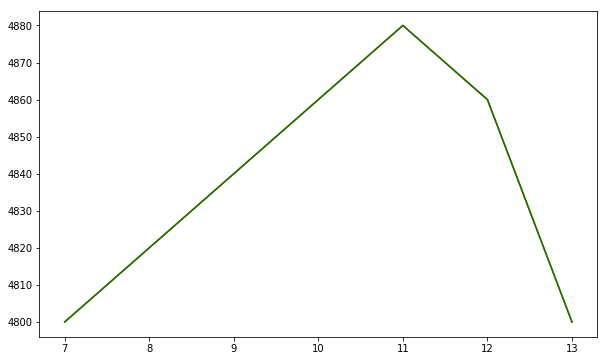

In [4]:
data['xishu'] = data['xishu']*100/(data['xishu'].mean())
data['比准价格'] = data['单价']*1e12/(data['朝向系数']*data['成新系数']*data['结构系数']*data['面积系数']*data['装修系数']*data['xishu'])
data['基准价格'] = data['比准价格'].mean()
data['评估价格'] = data['基准价格']*(data['朝向系数']*data['成新系数']*data['结构系数']*data['面积系数']*data['装修系数']*data['xishu'])/1e12
fig = plt.figure(figsize=(10,6))
plt.plot(data['单价'],color = 'r')
plt.plot(data['评估价格'],color = 'g')

In [5]:
data

,城市,行政区域,类型,小区名称,地址,所在楼层,总楼层,面积,结构,建筑年代,...,朝向系数,成新系数,结构系数,面积系数,装修系数,ratio,xishu,评估价格,比准价格,基准价格
7,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,2,8,98.30,钢筋混凝土结构,2013,...,100,103,102,100,98,0.250,99.232132,4800.0,4698.134455,4698.134455
8,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,3,8,99.17,钢筋混凝土结构,2013,...,100,103,102,100,98,0.375,99.645600,4820.0,4698.134455,4698.134455
9,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,4,8,98.30,钢筋混凝土结构,2013,...,100,103,102,100,98,0.500,100.059067,4840.0,4698.134455,4698.134455
10,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,5,8,99.46,钢筋混凝土结构,2013,...,100,103,102,100,98,0.625,100.472534,4860.0,4698.134455,4698.134455
11,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,6,8,99.17,钢筋混凝土结构,2013,...,100,103,102,100,98,0.750,100.886001,4880.0,4698.134455,4698.134455
12,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,7,8,98.30,钢筋混凝土结构,2013,...,100,103,102,100,98,0.875,100.472534,4860.0,4698.134455,4698.134455
13,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,8,8,99.46,钢筋混凝土结构,2013,...,100,103,102,100,98,1.000,99.232132,4800.0,4698.134455,4698.134455


### 归一化之后

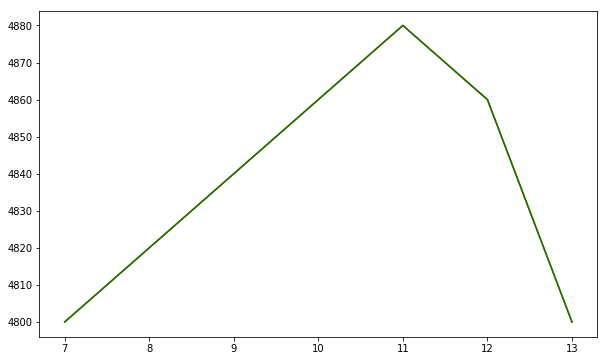

In [6]:
data['xishu'] = data['xishu']*100/(data['xishu'].mean())
data['比准价格'] = data['单价']*1e12/(data['朝向系数']*data['成新系数']*data['结构系数']*data['面积系数']*data['装修系数']*data['xishu'])
data['基准价格'] = data['比准价格'].mean()
data['评估价格'] = data['基准价格']*(data['朝向系数']*data['成新系数']*data['结构系数']*data['面积系数']*data['装修系数']*data['xishu'])/1e12
fig = plt.figure(figsize=(10,6))
plt.plot(data['单价'],color = 'r')
plt.plot(data['评估价格'],color = 'g')

由此可以看出，归一化之后的评估价格不会有变化，所以可以放心地对系数进行归一化

In [7]:
data

,城市,行政区域,类型,小区名称,地址,所在楼层,总楼层,面积,结构,建筑年代,...,朝向系数,成新系数,结构系数,面积系数,装修系数,ratio,xishu,评估价格,比准价格,基准价格
7,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,2,8,98.30,钢筋混凝土结构,2013,...,100,103,102,100,98,0.250,99.232132,4800.0,4698.134455,4698.134455
8,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,3,8,99.17,钢筋混凝土结构,2013,...,100,103,102,100,98,0.375,99.645600,4820.0,4698.134455,4698.134455
9,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,4,8,98.30,钢筋混凝土结构,2013,...,100,103,102,100,98,0.500,100.059067,4840.0,4698.134455,4698.134455
10,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,5,8,99.46,钢筋混凝土结构,2013,...,100,103,102,100,98,0.625,100.472534,4860.0,4698.134455,4698.134455
11,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,6,8,99.17,钢筋混凝土结构,2013,...,100,103,102,100,98,0.750,100.886001,4880.0,4698.134455,4698.134455
12,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,7,8,98.30,钢筋混凝土结构,2013,...,100,103,102,100,98,0.875,100.472534,4860.0,4698.134455,4698.134455
13,宿州市,埇桥区,中高层住宅,三里洋房 3.5# （8）一层门面 有地下室,迎宾大道与淮海南路交叉口,8,8,99.46,钢筋混凝土结构,2013,...,100,103,102,100,98,1.000,99.232132,4800.0,4698.134455,4698.134455


## 细分探索

In [8]:
def divide_into(floor =8):
    d1 = df[df['总楼层'] == floor]
    for name,group in d1.groupby('小区名称'):
        group['xishu'] = 100 * group['xishu']/group['xishu'].mean()
        plt.plot(group['所在楼层']/group['总楼层'],group['xishu'])

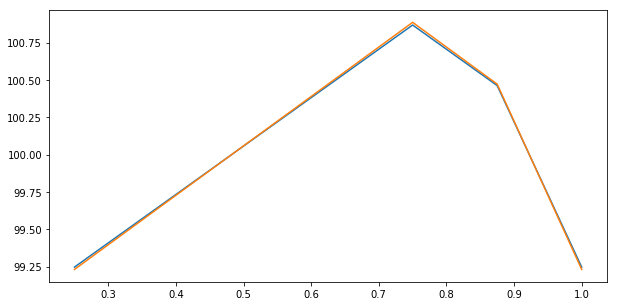

In [9]:
plt.figure(figsize=(10,5))
divide_into(8)

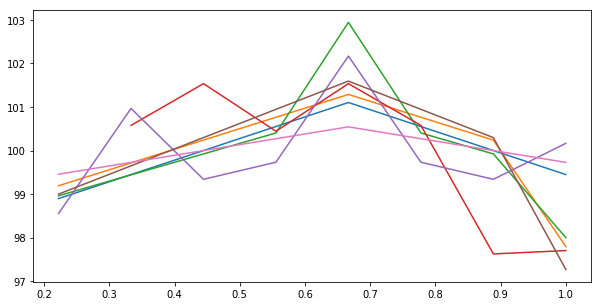

In [10]:
plt.figure(figsize=(10,5))
divide_into(floor = 9)

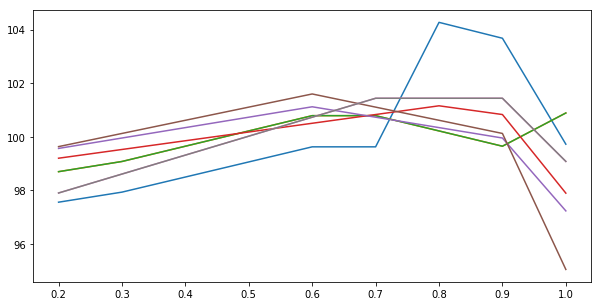

In [11]:
plt.figure(figsize=(10,5))
divide_into(floor = 10)

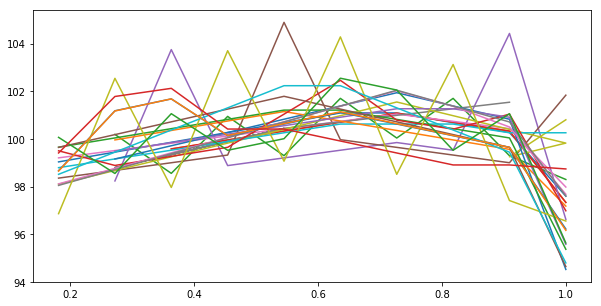

In [12]:
plt.figure(figsize=(10,5))
divide_into(floor = 11)

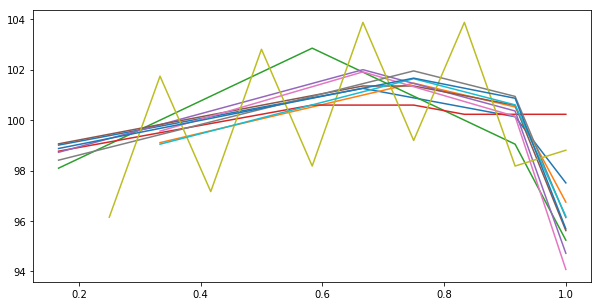

In [13]:
plt.figure(figsize=(10,5))
divide_into(floor = 12)

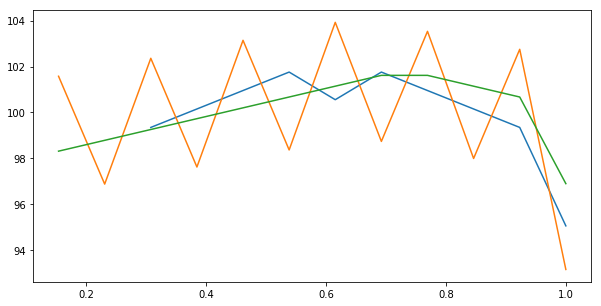

In [14]:
plt.figure(figsize=(10,5))
divide_into(floor = 13)

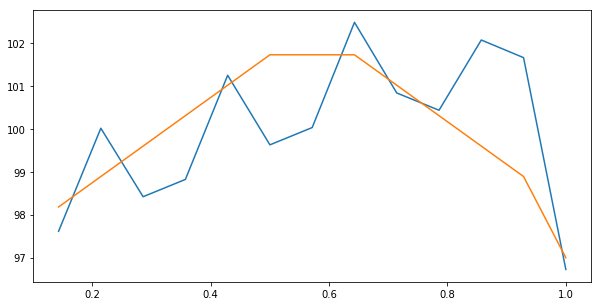

In [15]:
plt.figure(figsize=(10,5))
divide_into(floor = 14)

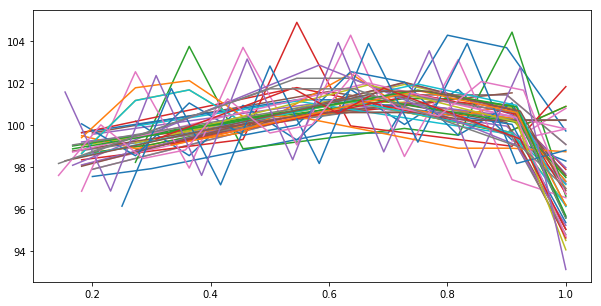

In [16]:
plt.figure(figsize=(10,5))
for i in range(10,15):
    divide_into(floor = i)

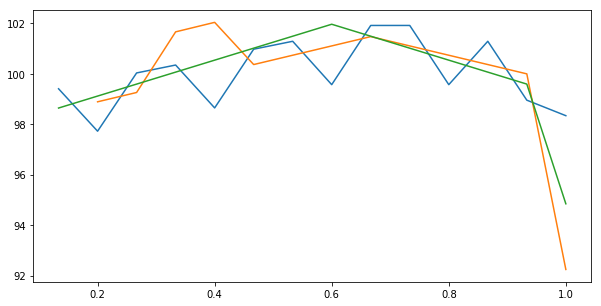

In [17]:
plt.figure(figsize=(10,5))
divide_into(floor = 15)

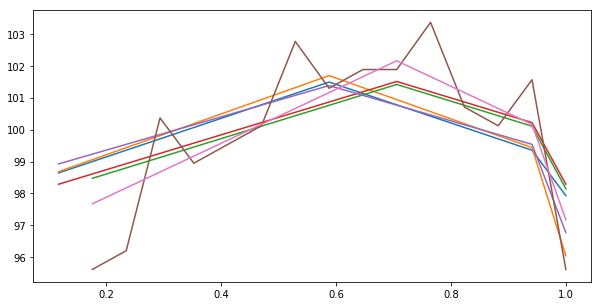

In [18]:
plt.figure(figsize=(10,5))
divide_into(floor = 17)

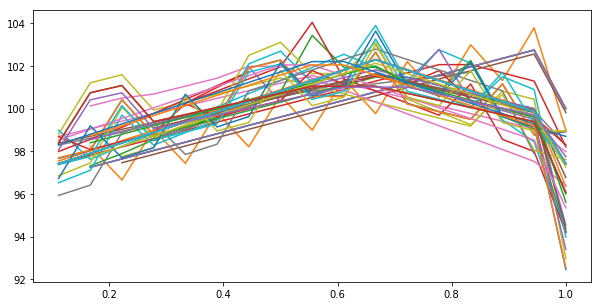

In [19]:
plt.figure(figsize=(10,5))
divide_into(floor = 18)

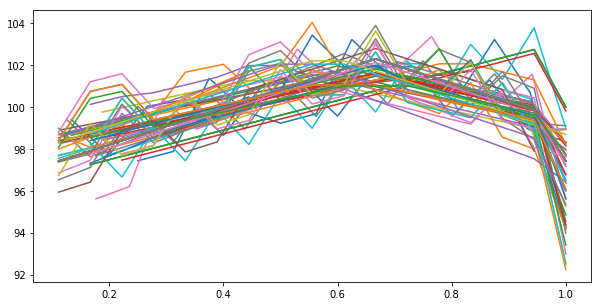

In [20]:
plt.figure(figsize=(10,5))
for i in range(15,19):
    divide_into(floor=i)

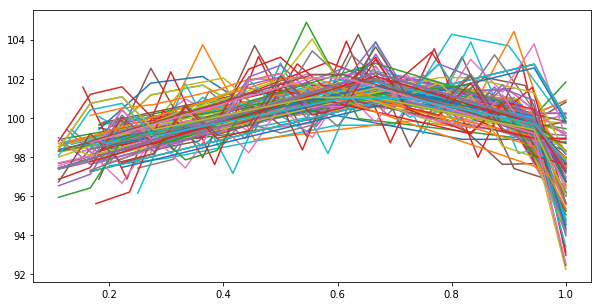

In [21]:
plt.figure(figsize=(10,5))
for i in range(8,19):
    divide_into(floor=i)

In [22]:
# 15-18 为一组

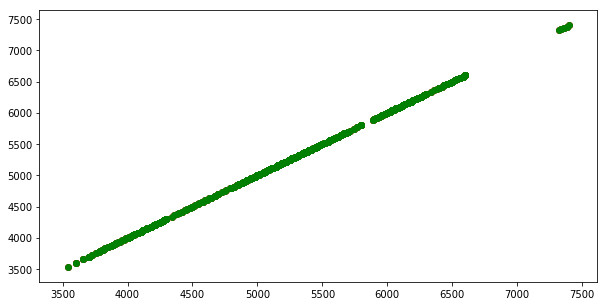

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df['单价'],df['单价'],color = 'r')
plt.scatter(df['单价'],df['评估价格'],color = 'g')